In [1]:
import os
import sys
import subprocess
import datetime as dt
import itertools
import numpy as np
import xarray as xr
from dask.distributed import Client, LocalCluster
import dask.array as da
import matplotlib.pyplot as plt
from MHW_daily_calcs import workdir, mdirC5, fnameCanESMClim

In [8]:
climyrs=[1993,2023]
ff={}
for mm in range(1,13): # month loop 
    fnameclim=fnameCanESMClim(workdir,climyrs[0],climyrs[-1],mm)
    ff[mm]=xr.open_mfdataset(fnameclim,decode_times=False)

In [9]:
ff[1]

<xarray.Dataset> Size: 111MB
Dimensions:   (lat: 180, leadtime: 215, lon: 360)
Coordinates:
  * lat       (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * leadtime  (leadtime) float64 2kB 15.0 39.0 63.0 ... 5.127e+03 5.151e+03
  * lon       (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Data variables:
    tso       (leadtime, lat, lon) float64 111MB dask.array<chunksize=(215, 180, 360), meta=np.ndarray>

In [5]:
ff[1].tso

<xarray.DataArray 'tso' (leadtime: 215, lat: 180, lon: 360)> Size: 111MB
dask.array<open_dataset-tso, shape=(215, 180, 360), dtype=float64, chunksize=(215, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat       (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * leadtime  (leadtime) timedelta64[ns] 2kB 0 days 15:00:00 ... 214 days 15:...
  * lon       (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5

In [6]:
for mm in range(1,13):
    print(mm,np.sum(~np.isnan(ff[mm].tso.values)))

1 8999685
2 8999685
3 8999685
4 8999685
5 8999685
6 8999685
7 8999685
8 8999685
9 8999685
10 8999685
11 8999685
12 8999685


Text(0, 0.5, 'SST (K)')

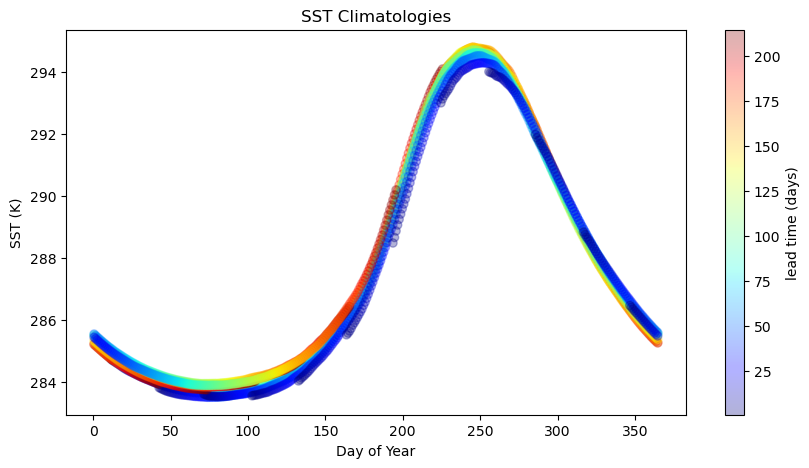

In [29]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
for mm in range(1,13):
    t=(dt.datetime(2024,mm,1)-dt.datetime(2023,12,21)).total_seconds()/(24*3600)+ff[mm].leadtime.values/24
    t=t%365
    m=ax.scatter(t,ff[mm].tso.isel(lat=130,lon=200).values,c=ff[mm].leadtime.values/24,cmap=plt.get_cmap('jet'),alpha=.3)
fig.colorbar(m,label='lead time (days)')
ax.set_title('SST Climatologies')
ax.set_xlabel('Day of Year')
ax.set_ylabel('SST (K)')